In [ ]:
import skimage
import numpy as np
import numpy.typing as npt
from support.bounding_boxes import draw_bounding_boxes, create_bounding_boxes
import matplotlib.pyplot as plt
from skimage.morphology import dilation, disk

Take picture whit camera (insert code from previous lectures):

In [5]:
# insert your code here to assign an image to 'img'
img = skimage.io.imread('images/gummibaerchen.jpg')

Define function for color assignment according to the given function definition:

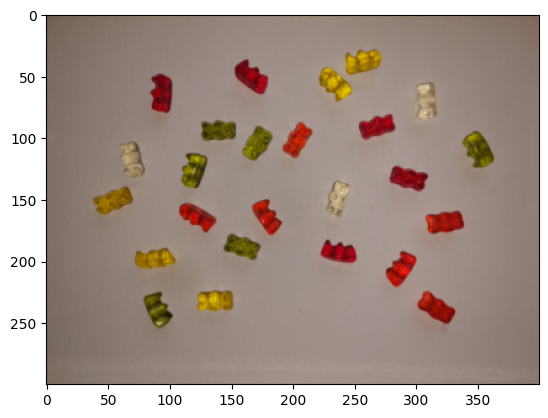

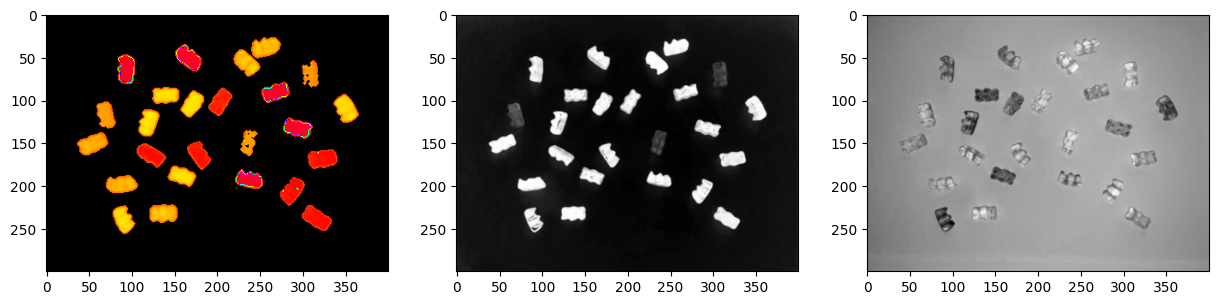

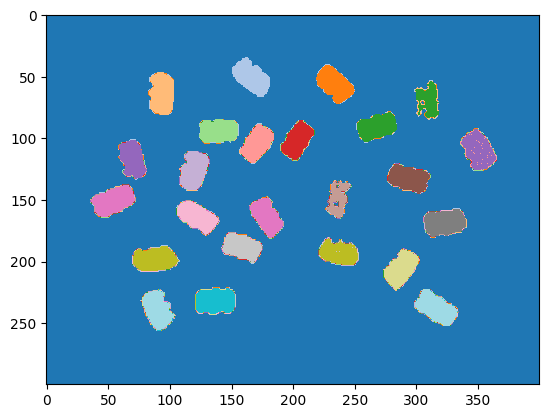

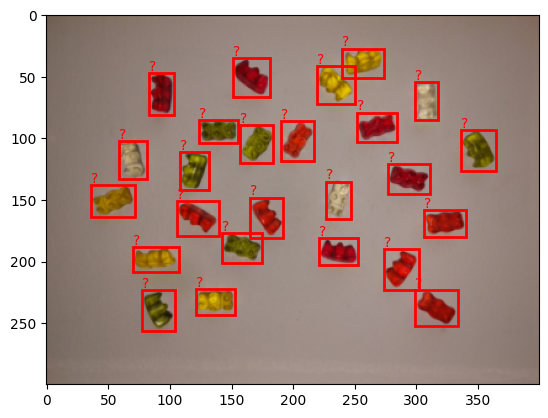

In [ ]:
def assign_label_color(hue: npt.NDArray[float], saturation: npt.NDArray[float]) -> str:
    """
    Assigns a color label based on the hue and saturation values of an image.
    Parameters:
    hue (npt.NDArray[float]): An array of hue values.
    saturation (npt.NDArray[float]): An array of saturation values.
    Returns:
    str: The assigned color label ('orange', 'yellow', 'green', or 'red').
    """
    # placeholder, insert code here
    return "?"

# scale image
img = skimage.transform.resize(img, (300, 400))

plt.imshow(img)
plt.show()

# calculate hue, saturation and value
img = skimage.color.rgba2rgb(img)
hsv = skimage.color.rgb2hsv(img)

hue, s, v = np.transpose(hsv, (2, 0, 1))

# mask over saturation, use own threshold
mask = s > 0.32
mask = dilation(mask, footprint = disk(2))

# display images

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(hue, cmap='hsv')
axes[0].imshow(np.where( np.expand_dims(mask, -1), [0,0,0,0], [0,0,0,255]), cmap='gray')

axes[1].imshow(s, cmap='gray')

axes[2].imshow(v, cmap='gray')
plt.show()


segmentation = skimage.measure.label(mask, background=0)
plt.imshow(segmentation, cmap='tab20')
plt.show()

rectangles = create_bounding_boxes(segmentation)

labels = []
for rect in rectangles:
    x, y, w, h = rect
    hue_rect = hue[y:y+h, x:x+w]
    saturation_rect = s[y:y+h, x:x+w]
    labels.append(assign_label_color(hue_rect, saturation_rect))

draw_bounding_boxes(rectangles, labels)

plt.imshow(img, cmap='tab20')
plt.show()